# Знакомство с pytorch (5 баллов)

In [5]:
import torch
import numpy as np
!pip install scikit-learn==1.1

     ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
     - -------------------------------------- 0.3/6.8 MB ? eta -:--:--
     --- ------------------------------------ 0.5/6.8 MB 1.8 MB/s eta 0:00:04
     ------ --------------------------------- 1.0/6.8 MB 1.9 MB/s eta 0:00:04
     --------- ------------------------------ 1.6/6.8 MB 1.8 MB/s eta 0:00:03
     ---------- ----------------------------- 1.8/6.8 MB 1.9 MB/s eta 0:00:03
     --------------- ------------------------ 2.6/6.8 MB 2.1 MB/s eta 0:00:03
     ---------------- ----------------------- 2.9/6.8 MB 2.1 MB/s eta 0:00:02
     ------------------- -------------------- 3.4/6.8 MB 2.1 MB/s eta 0:00:02
     --------------------- ------------------ 3.7/6.8 MB 2.1 MB/s eta 0:00:02
     ----------------------- ---------------- 3.9/6.8 MB 2.0 MB/s eta 0:00:02
     -------------------------- ------------- 4.5/6.8 MB 2.0 MB/s eta 0:00:02
     --

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [32 lines of output]
  Traceback (most recent call last):
    File "C:\Users\cat\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
      main()
      ~~~~^^
    File "C:\Users\cat\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
      json_out["return_val"] = hook(**hook_input["kwargs"])
                               ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\cat\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 137, in get_requires_for_build_wheel
      backend = _build_backend()
    File "C:\Users\cat\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 70, in _build_backend
      obj = import_module(mod_path)
    File "C:\Users\cat\anaconda3\Lib\importlib\__init__.py", 

In [6]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n %s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", np.dot(x, x.T))
print("mean over cols :\n%s" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s" % (np.cumsum(x, axis=0)))

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [7]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", torch.matmul(x, x.transpose(1, 0)))
print("mean over cols :\n", torch.mean(x, dim=-1))
print("cumsum of cols :\n", torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy vs Pytorch

Numpy и Pytorch не требуют описания статического графа вычислений.

Можно отлаживаться с помощью pdb или просто print.

API несколько различается:

```
x.reshape([1,2,8]) -> x.view(1,2,8)
x.sum(axis=-1) -> x.sum(dim=-1)
x.astype('int64') -> x.type(torch.int64)
```


Легко конвертировать между собой:

```
torch.from_numpy(npx) -- вернет Tensor
tt.numpy() -- вернет Numpy Array
```

Преобразовать тензор из одного числа в обычное питоновское число:
```
torch.tensor([1]).item() -> 1
```


Если что:
- смотрите документацию https://pytorch.org/docs/
- гуглите (Stackoverflow/tutorials)

Давайте кое что посчитаем

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


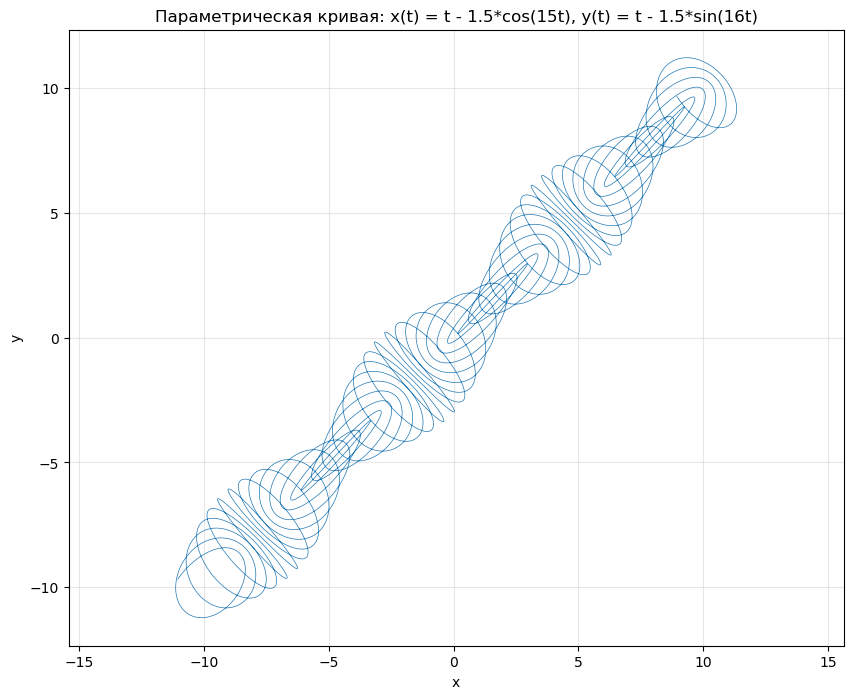

In [8]:
import torch
import matplotlib.pyplot as plt

# Определяем параметр t
t = torch.linspace(-10, 10, steps=10000)

# Вычисляем x(t) и y(t)
x = t - 1.5 * torch.cos(15 * t)
y = t - 1.5 * torch.sin(16 * t)

# Строим график
plt.figure(figsize=(10, 8))
plt.plot(x.numpy(), y.numpy(), linewidth=0.5)
plt.title('Параметрическая кривая: x(t) = t - 1.5*cos(15t), y(t) = t - 1.5*sin(16t)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Automatic gradients

У каждого тензора в Pytorch есть флаг `requires_grad`, который отвечает за автоматическое вычисление градиентов:

1. Создать переменную: `a = torch.tensor(..., requires_grad=True)`

2. Определить какую-нибудь дифференцируемую функцию `loss = whatever(a)`

3. Запросить обратный проход `loss.backward()`

4. Градиенты будут доступны в `a.grads`


Есть два важных отличия Pytorch от Theano/TF:

1. Функцию ошибки можно изменять динамически, например на каждом минибатче.

2. После вычисления `.backward()` градиенты сохраняются в `.grad` каждой задействованной переменной, при повторных вызовах градиенты суммируются. Это позволяет использовать несколько функций ошибок или виртуально увеличивать batch_size. Поэтому, после каждого шага оптимизатора градиенты стоит обнулять.



## Leaf vs Non-leaf Variable:
```
x = torch.tensor([1., 2., 3., 4.], requires_grad=True))  # leaf tensor
y = x + 1  # not a leaf variable
```

Градиенты будут сохранены и доступны для использования только для `leaf tensor`.
Такое поведение по-умолчанию сделано ради экономии памяти. Все тензоры с флагом `requires_grad = False` считаются`leaf tensors` по умолчанию.


Обратите внимание, что вычисление градиентов работает только для тензоров с вещественным типом данных:

In [ ]:
# will not work
#x = torch.tensor([1, 2, 3, 4], requires_grad=True)


Чтобы выставить флаг `requires_grad=False` и выключить автоматическое вычисление градиентов для нескольких тензоров, можно использовать `with torch.no_grad()` или `detach`:

In [ ]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    z = torch.exp(x)
    print(z.requires_grad)

# detach from the graph
w = torch.log(x).detach()
print(w.requires_grad)

True
True
False
False


Рассмотрим пример линейной регрессии на датасете Boston

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

x, y = data, target

#select one column for simplicity.
x = x[:, -1] / x[:, -1].std()
y = y / y.std()

plt.scatter(x, y)

In [21]:
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# все тензоры являются leaf-tensors
# x и y не требуют вычисления градиентов
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


# Линейная регрессия c помощью pytroch

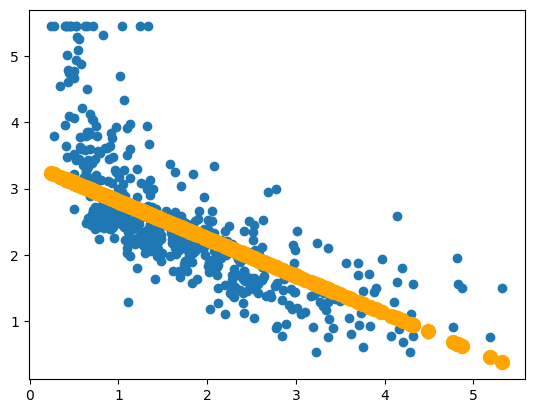

loss =  0.4930795
Done!


In [22]:
from IPython.display import clear_output
import torch
import matplotlib.pyplot as plt

# инициализация весов с градиентами
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

for i in range(1000):
    # формулка с доски
    y_pred = w * x + b
    
    # MSE loss
    loss = torch.mean((y_pred - y) ** 2)

    loss.backward()
    
    # update (параметры)
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    # обнуление градиентов
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # визуализация
    if (i+1) % 10 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()
        
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

# Optimizers

В этом примере мы пользовались простым правилом для градиентного спуска:
  
$$\theta^{n+1} = \theta^{n} - \alpha \nabla_{\theta}L$$


Единственным параметром в нем является $\alpha$ -- это `learning_rate`.

На практике часто используют различные модификации (например _Momentum_):

$$\theta^{n+1} = \theta^{n} - U^{n}\\
U^{n} = \gamma U^{n-1} + \alpha \nabla_{\theta}(L)
$$

Хороший обзор алгоритмов оптимизации для сетей можно посмотреть [тут](http://ruder.io/optimizing-gradient-descent/).



Pytorch предоставляет практически все широкораспространненные оптимизаторы:    
http://pytorch.org/docs/master/optim.html




Оптимизаторы удобны в использовании:

- требуется указать список переменных для оптимизации
- `opt.step()` применяет `update` ($U^{n}$) к весам
- `opt.zero_grad()` сбрасывает градиенты





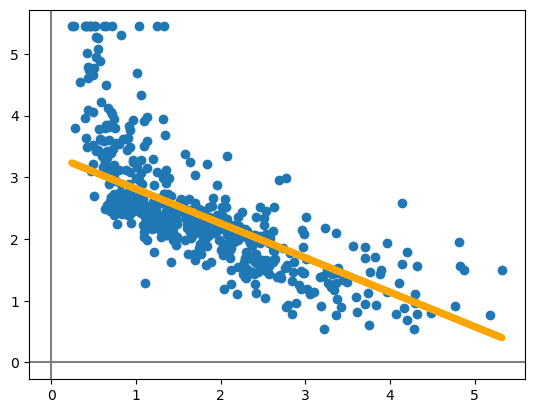

loss =  0.49351760745048523
Done!

Финальные значения:
w = -0.5710
b = 3.3977
Loss = 0.4935


In [23]:
# get data
#x, y = load_boston(return_X_y=True)
#x = x[:, -1] / x[:, -1].std()
#y = y / y.std()

# data tensors
#x = torch.from_numpy(x).type(torch.float)
#y = torch.from_numpy(y).type(torch.float)

# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# define optimizer
opt = torch.optim.RMSprop([w, b], lr=0.1)

for i in range(100):
    # посчитайте ошибку

    # backprop and gradient descent но теперь не руками а с помощью оптимизатора и функци описанных выше
    
    # 1. Вычисляем предсказание
    y_pred = w * x + b
    
    # 2. Вычисляем ошибку (MSE)
    loss = torch.mean((y_pred - y) ** 2)
    
    # 3. Backpropagation
    loss.backward()
    
    # 4. Оптимизация (шаг градиентного спуска)
    opt.step()
    
    # 5. Обнуляем градиенты
    opt.zero_grad()

    #the rest of code is just bells and whistles
    if (i + 1) % 10 == 0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

print(f"\nФинальные значения:")
print(f"w = {w.item():.4f}")
print(f"b = {b.item():.4f}")
print(f"Loss = {loss.item():.4f}")

# Немного более сложных тензоров (2 балла)

$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$

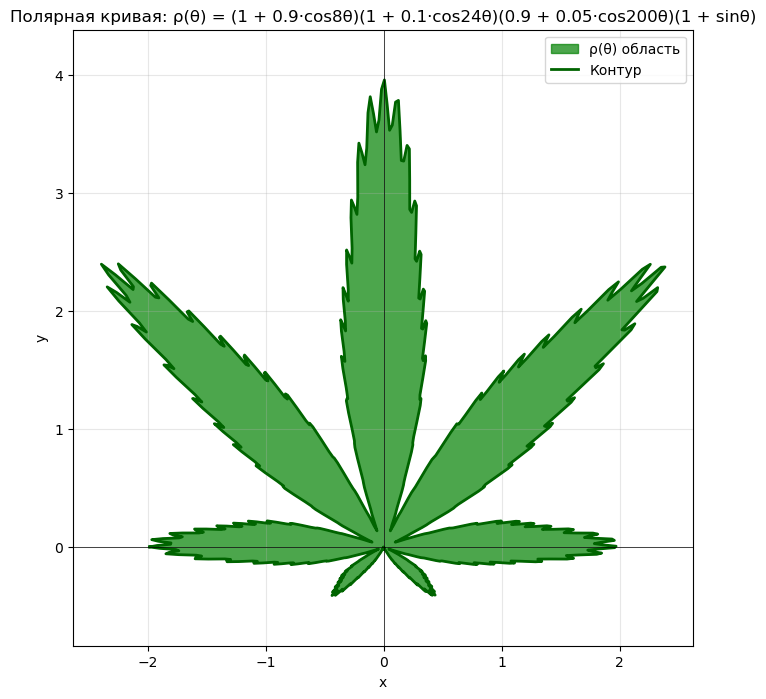

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# тензор theta
theta = torch.linspace(-np.pi, np.pi, steps=1000)

# формулка
rho = (1 + 0.9 * torch.cos(8 * theta)) * \
      (1 + 0.1 * torch.cos(24 * theta)) * \
      (0.9 + 0.05 * torch.cos(200 * theta)) * \
      (1 + torch.sin(theta))

# в декарты
x = rho * torch.cos(theta)
y = rho * torch.sin(theta)

# график
plt.figure(figsize=[8, 8])

plt.fill(x.numpy(), y.numpy(), color='green', alpha=0.7, label='ρ(θ) область')

plt.plot(x.numpy(), y.numpy(), color='darkgreen', linewidth=2, label='Контур')

plt.grid(True, alpha=0.3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Полярная кривая: ρ(θ) = (1 + 0.9·cos8θ)(1 + 0.1·cos24θ)(0.9 + 0.05·cos200θ)(1 + sinθ)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

plt.show()


## Highlevel-API (5 баллов)

При работе с нейронными сетями становится неудобно контролировать переменные с весами по-отдельности. Pytorch предоставляет высокоуровневый API для моделей http://pytorch.org/docs/master/nn.html#torch.nn.Module.


Чтобы воспользоваться моделью необходимо отнаследоваться от torch.nn.Module, определить слои и описать `forward`, `backward` будет вычислен автоматически.


Для демонстрации воспользуемся MNIST'ом.

# Я не воспользовался util.py, он не хочет работать

А вот так уже в почти приличном мире описывают сетки. Приличный мир будет в следующей дз. Здесь строится сетка - классификатор

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Размеры данных:
X_train: (48000, 784), y_train: (48000,)
X_val: (12000, 784), y_val: (12000,)
X_test: (10000, 784), y_test: (10000,)


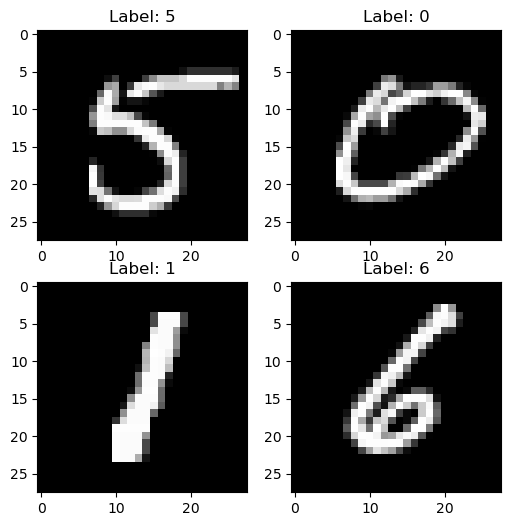

In [4]:
# MNIST data loading
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import trange
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

# Загружаем данные MNIST с помощью torchvision
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Преобразуем 28x28 в 784
])

# Загружаем тренировочные данные
train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

# Загружаем тестовые данные
test_dataset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# Преобразуем в numpy массивы
X_train_full = train_dataset.data.numpy().reshape(-1, 784).astype(np.float32) / 255.0
y_train_full = train_dataset.targets.numpy()

X_test = test_dataset.data.numpy().reshape(-1, 784).astype(np.float32) / 255.0
y_test = test_dataset.targets.numpy()

# Разделяем тренировочные данные на тренировочную и валидационную части
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

print(f"Размеры данных:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Визуализируем несколько примеров
plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(f"Label: {y_train[i]}")
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray')
plt.show()

# Higher-level API:
class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # Создаем слои нейронной сети
        self.fc1 = nn.Linear(784, hidden_size)  # входной слой: 784 -> hidden_size
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # скрытый слой: hidden_size -> hidden_size
        self.fc3 = nn.Linear(hidden_size, 10)  # выходной слой: hidden_size -> 10 классов

    def forward(self, x):
        # Применяем ReLU к внутренним слоям
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=-1)


In [5]:

# Проверка модели
model = Net()
tt = torch.from_numpy(X_train[:10, :].astype(np.float32))
output = model(tt)

print('Model outputs: \n', output)
probs = torch.softmax(output, dim=-1)
print('Probs: \n', probs)

pred = torch.argmax(probs, dim=-1, keepdim=True)
print('Pred: \n', pred.data.numpy().flatten())
print('Truth: \n', y_train[:10])


Model outputs: 
 tensor([[-2.3366, -2.2349, -2.2249, -2.3208, -2.3438, -2.3754, -2.0664, -2.4881,
         -2.4041, -2.2919],
        [-2.3397, -2.2441, -2.1957, -2.3045, -2.3752, -2.3732, -2.0352, -2.4965,
         -2.4182, -2.3201],
        [-2.3560, -2.2275, -2.1816, -2.3186, -2.3794, -2.3839, -2.0677, -2.4575,
         -2.4288, -2.2919],
        [-2.3435, -2.2489, -2.1926, -2.3254, -2.3532, -2.3631, -2.0748, -2.4499,
         -2.4194, -2.3121],
        [-2.3607, -2.2322, -2.2095, -2.3077, -2.3590, -2.3718, -2.0797, -2.4602,
         -2.4265, -2.2775],
        [-2.3368, -2.2509, -2.1946, -2.3341, -2.3625, -2.3743, -2.0811, -2.4662,
         -2.4139, -2.2699],
        [-2.3413, -2.2359, -2.2044, -2.3459, -2.3565, -2.3883, -2.0616, -2.4608,
         -2.4230, -2.2729],
        [-2.3110, -2.2786, -2.2003, -2.2792, -2.3557, -2.3719, -2.0439, -2.4535,
         -2.4607, -2.3407],
        [-2.3518, -2.2211, -2.1803, -2.3300, -2.3858, -2.3594, -2.0999, -2.4598,
         -2.4291, -2.2683],
  

Тренировка сети

Для тренировки сети нам требуется
- итератор по данным
- функция тренировки (прогон по данным, вычисление и применение градиентов)
- функция валидации (прогон по тестовым данным, вычисление метрик)

In [6]:
from IPython.display import clear_output
from tqdm import trange


# Функция для итераций по минибатчам
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]


Обучаем также как и в случае линейной регрессии. Предсказываем результат по данным. Обучаем. В данном случае только функционал ошибки другой, не заморачивайтесь об этом. О вспомогательных функциях тоже не заморачивайтесь. Тут только надо знать что нейросети обучают батчами

In [7]:

# Функция тренировки
def train(model, optimizer, batchsize=32):
    loss_log = []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # Data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        
        # Вычисляем градиенты
        loss.backward()
        # Делаем шаг оптимизации
        optimizer.step()
        
        loss = loss.item()
        loss_log.append(loss)
    return loss_log

# Функция валидации
def test(model, X_data, y_data, batchsize=32):
    loss_log = []
    accuracy_log = []
    model.eval()
    for x_batch, y_batch in iterate_minibatches(X_data, y_data, batchsize=batchsize, shuffle=False):
        # Data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        output = model(data)
        loss = F.nll_loss(output, target)
        
        # Вычисляем accuracy
        pred = torch.argmax(output, dim=1)
        accuracy = (pred == target).float().mean().item()
        
        loss = loss.item()
        loss_log.append(loss)
        accuracy_log.append(accuracy)
    
    return np.mean(loss_log), np.mean(accuracy_log)


In [8]:

# Функция для отображения истории обучения
def plot_history(train_history, val_history, val_accuracy=None, title='loss'):
    clear_output(True)
    
    if val_accuracy is not None:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Лосс
        ax = axes[0]
        ax.axhline(0, color='gray')
        ax.axvline(0, color='gray')
        step = len(train_history) / len(val_history)
        ax.plot(np.arange(len(train_history)), train_history, color='orange', zorder=1, label='Train loss')
        ax.scatter(np.arange(step, len(val_history) * step + step, step), 
                  val_history, zorder=2, label='Val loss', color='red')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Loss')
        ax.set_title('Training and Validation Loss')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Accuracy
        ax = axes[1]
        ax.axhline(0, color='gray')
        ax.axvline(0, color='gray')
        ax.plot(np.arange(len(val_accuracy)), val_accuracy, color='blue', zorder=2)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.set_title('Validation Accuracy')
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, 1)
        
    else:
        plt.figure(figsize=(8, 6))
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        step = len(train_history) / len(val_history)
        plt.plot(np.arange(len(train_history)), train_history, color='orange', zorder=1)
        plt.scatter(np.arange(step, len(val_history) * step + step, step), val_history, zorder=2)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()



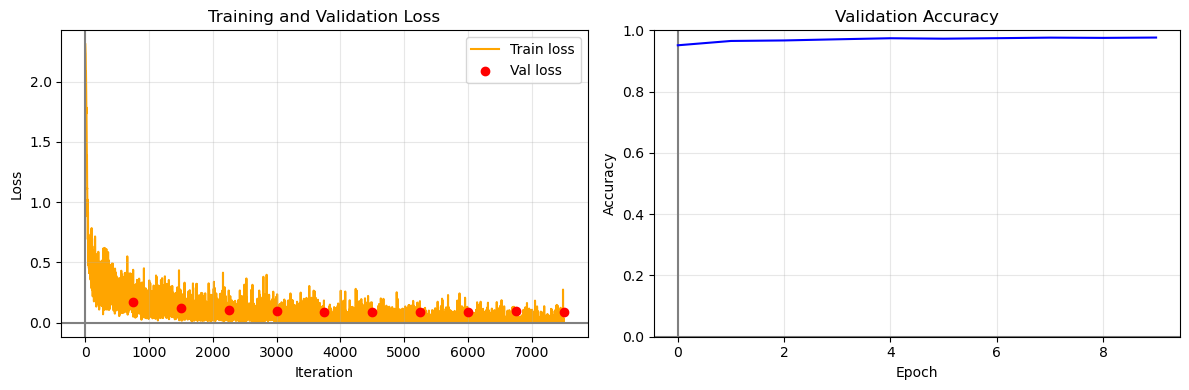

Train loss: 0.0230
Val loss: 0.0935
Val accuracy: 0.9764

Тестирование на тестовой выборке:


100%|██████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 2516.15it/s]

Test loss: 0.0953
Test accuracy: 0.9741

Примеры предсказаний на тестовой выборке:


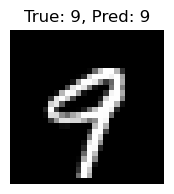

Изображение 5424: True=9, Pred=9
Вероятности: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
------------------------------


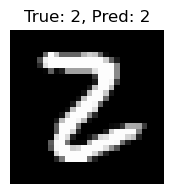

Изображение 4981: True=2, Pred=2
Вероятности: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------------------------------


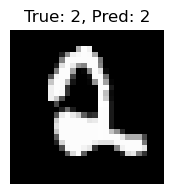

Изображение 6057: True=2, Pred=2
Вероятности: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------------------------------


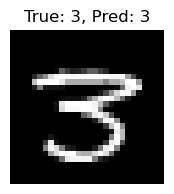

Изображение 3456: True=3, Pred=3
Вероятности: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
------------------------------


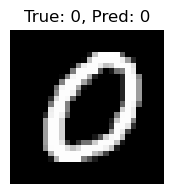

Изображение 4958: True=0, Pred=0
Вероятности: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------


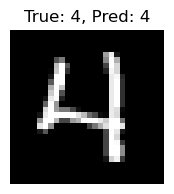

Изображение 5927: True=4, Pred=4
Вероятности: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------


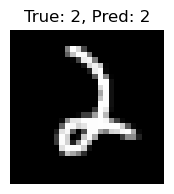

Изображение 3274: True=2, Pred=2
Вероятности: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------------------------------


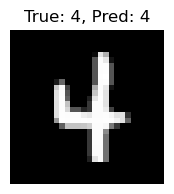

Изображение 6812: True=4, Pred=4
Вероятности: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------


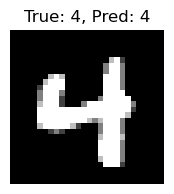

Изображение 6076: True=4, Pred=4
Вероятности: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------


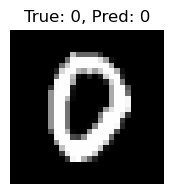

Изображение 4515: True=0, Pred=0
Вероятности: [0.998 0.    0.    0.    0.    0.    0.    0.    0.    0.002]
------------------------------
Модель сохранена в 'mnist_model.pth'

Статистика модели:
Всего параметров: 118282
Обучаемых параметров: 118282


In [9]:

# Обучение модели
train_log = []
val_log = []
val_acc_log = []

model = Net(hidden_size=128)  # Увеличим hidden_size для лучшей производительности
opt = torch.optim.Adam(model.parameters(), lr=0.001)  # Используем Adam вместо RMSprop
batchsize = 64  # Увеличим batchsize

for epoch in range(10):
    print(f"\nЭпоха {epoch+1}/10:")
    
    # Обучаем модель
    train_loss = train(model, opt, batchsize=batchsize)
    train_log.extend(train_loss)
    
    # Валидируем модель
    val_loss, val_acc = test(model, X_val, y_val, batchsize=batchsize)
    val_log.append(val_loss)
    val_acc_log.append(val_acc)
    
    # Отображаем историю обучения
    plot_history(train_log, val_log, val_acc_log)
    
    print(f"Train loss: {np.mean(train_loss):.4f}")
    print(f"Val loss: {val_loss:.4f}")
    print(f"Val accuracy: {val_acc:.4f}")

# Тестирование на тестовой выборке
print("\n" + "="*50)
print("Тестирование на тестовой выборке:")
test_loss, test_acc = test(model, X_test, y_test, batchsize=batchsize)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print("="*50)

# Визуализация предсказаний на тестовой выборке
print("\nПримеры предсказаний на тестовой выборке:")
model.eval()
with torch.no_grad():
    indices = np.random.choice(len(X_test), 10, replace=False)
    for i in indices:
        data = torch.from_numpy(X_test[i].reshape(1, -1).astype(np.float32))
        output = model(data)
        probs = torch.exp(output)
        pred = torch.argmax(probs, dim=1).item()
        
        plt.figure(figsize=(2, 2))
        plt.imshow(X_test[i].reshape([28, 28]), cmap='gray')
        plt.title(f"True: {y_test[i]}, Pred: {pred}")
        plt.axis('off')
        plt.show()
        
        print(f"Изображение {i}: True={y_test[i]}, Pred={pred}")
        print(f"Вероятности: {probs.squeeze().numpy().round(3)}")
        print("-"*30)



## Метрики

Logloss -- величина, которую трудно интерпретировать.
Для отслеживания тренировки и сравнения моделей удобнее наблюдать за интерпретируемыми метриками, например точностью (accuracy)



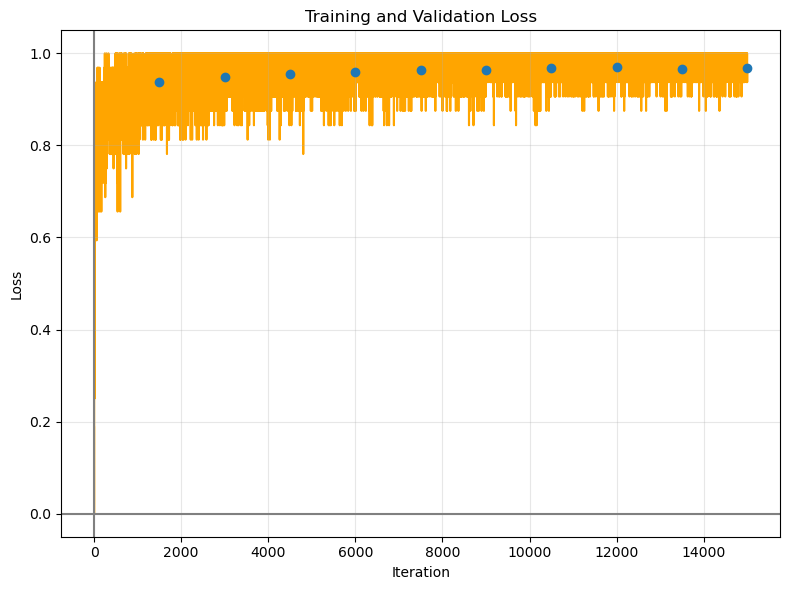

In [10]:
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)
        
        loss = F.nll_loss(output, target)
        
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()
        
        loss = loss.item()
        loss_log.append(loss)
        
        # Вычисляем accuracy
        probs = torch.softmax(output, dim=-1)
        pred = torch.argmax(probs, dim=-1, keepdim=True)
        acc_log.append(np.mean(pred.detach().numpy().flatten() == y_batch))
    
    return loss_log, acc_log

def test(model, batchsize=32):
    loss_log, acc_log = [], []
    model.eval()
    for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=batchsize, shuffle=False):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))
        
        output = model(data)
        loss = F.nll_loss(output, target)
        loss = loss.item()
        loss_log.append(loss)
        
        # Вычисляем accuracy
        probs = torch.softmax(output, dim=-1)
        pred = torch.argmax(probs, dim=-1, keepdim=True)
        acc_log.append(np.mean(pred.detach().numpy().flatten() == y_batch))
    
    return loss_log, acc_log

train_log, train_acc_log = [], []
val_log, val_acc_log = [], []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32


train_log = []
val_log = []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32

for epoch in range(10):
    train_loss, train_acc = train(model, opt, batchsize=batchsize)
    train_log.extend(train_acc)

    val_loss, val_acc = test(model)
    val_log.append(np.mean(val_acc))

    plot_history(train_log, val_log, title = 'acc')
